In [1]:
import rebound
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import norm
import re

In [11]:
sa  = rebound.SimulationArchive("/Users/rmelikyan/Projects/collresolve/rebound_connection/data/raw/sim_01.1_frag.bin") # Merc - Safe - 11
sa2 = rebound.SimulationArchive("/Users/rmelikyan/Projects/collresolve/rebound_connection/data/raw/sim_01.2_frag.bin") # Merc - Safe - 0
sa3 = rebound.SimulationArchive("/Users/rmelikyan/Projects/collresolve/rebound_connection/data/raw/sim_01.3_frag.bin") # Merc - NotSafe - 11
sa4 = rebound.SimulationArchive("/Users/rmelikyan/Projects/collresolve/rebound_connection/data/raw/sim_01.4_frag.bin") # Merc - NotSafe - 0
sa5 = rebound.SimulationArchive("/Users/rmelikyan/Projects/collresolve/rebound_connection/data/raw/sim_01.5_frag.bin") # Ias15
# sa = rebound.SimulationArchive("../inputs/sim_inits/sim_01_frag.bin")
num_saves = len(sa)
num_saves

501

In [12]:
def regex_decimal_number(string):
    return float(re.findall(r"[-+]?\d*\.\d+|\d+", string)[0])

def regex_sci_number(string):
    return float(re.findall(r"[+\-]?(?:0|[1-9]\d*)(?:\.\d+)?(?:[eE][+\-]?\d+)?", string)[0])

In [13]:
coll_time = []; E_lost = []
coll_time2 = []; E_lost2 = []
coll_time3 = []; E_lost3 = []
coll_time4 = []; E_lost4 = []
coll_time5 = []; E_lost5 = []
with open("/Users/rmelikyan/Projects/collresolve/rebound_connection/data/raw/sim_01.1_frag.log", 'r') as f:
    log = f.readlines()
for line in log:
    if 'COLLISION TIME' in line:
        coll_time.append(regex_decimal_number(line)) # Find arbitrary decimal number
    if 'Energy' in line:
        E_lost.append(regex_sci_number(line)) # find arbitrary scientific value

with open("/Users/rmelikyan/Projects/collresolve/rebound_connection/data/raw/sim_01.2_frag.log", 'r') as f:
    log = f.readlines()
for line in log:
    if 'COLLISION TIME' in line:
        coll_time2.append(regex_decimal_number(line)) # Find arbitrary decimal number
    if 'Energy' in line:
        E_lost2.append(regex_sci_number(line)) # find arbitrary scientific value

with open("/Users/rmelikyan/Projects/collresolve/rebound_connection/data/raw/sim_01.3_frag.log", 'r') as f:
    log = f.readlines()
for line in log:
    if 'COLLISION TIME' in line:
        coll_time3.append(regex_decimal_number(line)) # Find arbitrary decimal number
    if 'Energy' in line:
        E_lost3.append(regex_sci_number(line)) # find arbitrary scientific value

with open("/Users/rmelikyan/Projects/collresolve/rebound_connection/data/raw/sim_01.4_frag.log", 'r') as f:
    log = f.readlines()
for line in log:
    if 'COLLISION TIME' in line:
        coll_time4.append(regex_decimal_number(line)) # Find arbitrary decimal number
    if 'Energy' in line:
        E_lost4.append(regex_sci_number(line)) # find arbitrary scientific value

with open("/Users/rmelikyan/Projects/collresolve/rebound_connection/data/raw/sim_01.4_frag.log", 'r') as f:
    log = f.readlines()
for line in log:
    if 'COLLISION TIME' in line:
        coll_time5.append(regex_decimal_number(line)) # Find arbitrary decimal number
    if 'Energy' in line:
        E_lost5.append(regex_sci_number(line)) # find arbitrary scientific value

coll_time, E_lost, coll_time2, E_lost2, coll_time3, E_lost3, coll_time4, E_lost4, coll_time5, E_lost5

([2715.574078, 3196.584531, 3214.119295, 4476.830734],
 [-4.123136e-17, -5.655108e-14, -3.227413e-15, 4.831512e-16],
 [2715.574078, 3196.584531, 3214.119295],
 [-4.123136e-17, -5.655108e-14, -3.227418e-15],
 [1126.323776, 4006.494145, 4268.728849],
 [-2.208414e-16, -2.874114e-13, 4.406215e-16],
 [1126.323776, 4006.494145, 4644.153338],
 [-2.208414e-16, -2.874114e-13, 2.629357e-15],
 [1126.323776, 4006.494145, 4644.153338],
 [-2.208414e-16, -2.874114e-13, 2.629357e-15])

In [6]:
E0 = sa[0].calculate_energy()

dE = []; offset_index = 0; E_off = 0
dE2 = []; offset_index2 = 0; E_off2 = 0
dE3 = []; offset_index3 = 0; E_off3 = 0
dE4 = []; offset_index4 = 0; E_off4 = 0
dE5 = []; offset_index5 = 0; E_off5 = 0
times = []
# time3 = []

for i in range(len(sa)):
    sim = sa[i]; times.append(sim.t)
    sim.integrator_synchronize()
    if offset_index < len(coll_time)-1 and sim.t/365.25 > coll_time[offset_index]:
        E_off += E_lost[offset_index]; offset_index += 1
    dE.append(abs((sim.calculate_energy() + E_off - E0)/E0))

    sim2 = sa2[i]
    sim2.integrator_synchronize()
    if offset_index2 < len(coll_time2)-1 and sim2.t/365.25 > coll_time2[offset_index2]:
        E_off2 += E_lost2[offset_index2]; offset_index2 += 1
    dE2.append(abs((sim2.calculate_energy() + E_off2 - E0)/E0))

    sim3 = sa3[i]
    sim3.integrator_synchronize()
    if offset_index3 < len(coll_time3)-1 and sim3.t/365.25 > coll_time3[offset_index3]:
        E_off3 += E_lost3[offset_index3]; offset_index3 += 1
    dE3.append(abs((sim3.calculate_energy() + E_off3 - E0)/E0))

    sim4 = sa4[i]
    sim4.integrator_synchronize()
    if offset_index4 < len(coll_time4)-1 and sim4.t/365.25 > coll_time4[offset_index4]:
        E_off4 += E_lost4[offset_index4]; offset_index4 += 1
    dE4.append(abs((sim4.calculate_energy() + E_off4 - E0)/E0))

    sim5 = sa5[i]
    sim5.integrator_synchronize()
    if offset_index5 < len(coll_time5)-1 and sim5.t/365.25 > coll_time5[offset_index5]:
        E_off5 += E_lost5[offset_index5]; offset_index5 += 1
    dE5.append(abs((sim5.calculate_energy() + E_off5 - E0)/E0))

    
    
# for i in range(len(sa3)):
#     sim3 = sa3[i]
#     dE3.append(abs((sim3.calculate_energy() - E03)/E03))
#     sim3.integrator_synchronize()
#     time3.append(sim3.t)

In [7]:
E0

-3.2654065935230094e-08

(1.3133988296508662e-08, 8.755248680543e-09)

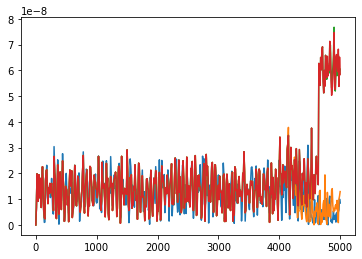

In [10]:
plt.plot(np.array(times[:])/365.25, dE[:])
# plt.plot(np.array(times[:])/365.25, dE2[:])
plt.plot(np.array(times[:])/365.25, dE3[:])
plt.plot(np.array(times[:])/365.25, dE4[:])
plt.plot(np.array(times[:])/365.25, dE5[:])
np.mean(dE[:380]), np.mean(dE[-100:])

In [73]:
sum([p.m for p in sa[0].particles]) - sum([p.m for p in sa[-1].particles])

/Users/rmelikyan/Projects/collresolve/.venv/lib/python3.9/site-packages/rebound/simulationarchive.py:146: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)


3.7265035501832244e-10

In [45]:
(2*5.014340e-08) - 1.000088e-07

2.7800000000001083e-10

In [18]:
tot_mass = np.zeros(num_saves)
max_mass = np.zeros(num_saves)
min_mass = np.zeros(num_saves)
num_ps = np.zeros(num_saves)
times = np.zeros(num_saves)
# smas = np.zeros(num_saves)
for i in range(num_saves):
    sim = sa[i]
    sim.move_to_com()
    ps = sim.particles[1:-2]
    masses = [p.m*333000 for p in ps]
    smas = [p.a for p in ps]
    ecs = [p.e for p in ps]
    tot_mass[i] = sum(masses)
    max_mass[i] = max(masses)
    min_mass[i] = min(masses)
    num_ps[i] = len(ps)
    times[i] = sim.t/365.25

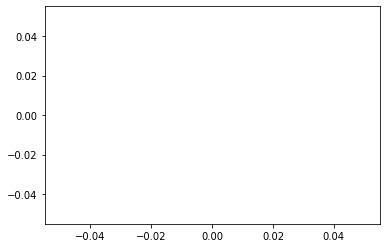

In [14]:
plt.plot(times, tot_mass)
plt.plot(times, max_mass)
plt.plot(times, min_mass)

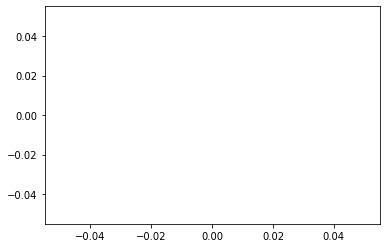

In [15]:
plt.plot(times, num_ps)

Text(1.120759656373408, 0.043695653014755684, 'Max Mass: 0.468 $M_\\oplus$')

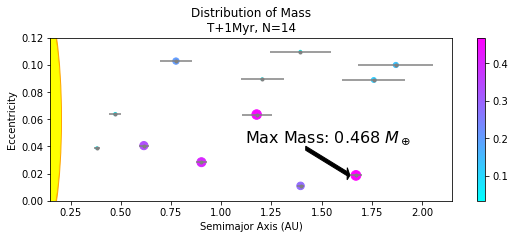

In [8]:
plt.figure(figsize=(9,3)); plt.xlim(0.15, 2.15); plt.ylim(0, .12)
plt.errorbar(smas, ecs, xerr=[a*e for a,e in zip(smas,ecs)], fmt='.', c='grey')
plt.colorbar(plt.scatter(smas, ecs, s=np.array(masses)*200, c=masses, cmap='cool'))
plt.title("Distribution of Mass\nT+1Myr, N=14", fontsize=12); plt.xlabel('Semimajor Axis (AU)'); plt.ylabel('Eccentricity')
circ  = plt.Circle((.12,.06), .085, color='orange'); plt.gca().add_patch(circ)
circ  = plt.Circle((.12,.06), .08, color='yellow'); plt.gca().add_patch(circ)
plt.arrow(smas[np.argmax(masses)]-.25, ecs[np.argmax(masses)]+.02, .22, -.02, length_includes_head = True, width=.003, color = 'black')
plt.text(smas[np.argmax(masses)]-.55, ecs[np.argmax(masses)]+.025, 'Max Mass: {:.3f} $M_\oplus$'.format(max(masses)), fontsize=16)
# plt.savefig("/Users/rmelikyan/Projects/collresolve/rebound_connection/notebooks/figures/Merger_1myr_DoM.png", dpi=300, bbox_inches='tight', facecolor='white')